**Ertugrul Kasikci 200104004097 CSE455 HW1 **

NOTE: To be able to run the codes below, the necessary files should be in a correct locations. They can be in another location but in this case the file path must be updated.

In [14]:
# KNN Classifier

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import timeit

# start time of the program
start = timeit.default_timer()

df = pd.read_csv('/content/audit_risk.csv')

#df.info()
#print(df.describe())
#print(df.isnull().sum())

df = df.apply(pd.to_numeric, errors='coerce') # Converts nonnumeric values to NaN so that we can discard them later
df=df.dropna()  # Drops missing records

# Splits the data values from their classes
X = df.drop(['Risk'], axis = 1)
y = df['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 30)  # Splits the data into train set, test set and their classes

# Holds the columns of the variables
cols = X_train.columns

# Applies feature scaling (this procces turns them into numpy arrays)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Makes them dataframe again
X_train = pd.DataFrame(X_train, columns=[cols]) 
X_test = pd.DataFrame(X_test, columns=[cols])

cv_val = 6

params = {
}

clf = GridSearchCV(
    estimator=KNeighborsClassifier(n_neighbors =5, p = 2), # KNN Classifier with Euclidean Disctance (p = 2) is selected
    param_grid=params,
    cv=cv_val, # 6-fold cross validation     
    n_jobs=5,
)

# fits the data and test the results with both X_train and X_test data to see if there is an overfitting
clf.fit(X_train, y_train)
predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)
print('Accuracy Score Train:',accuracy_score(y_train, predictions_train))
print('Accuracy Score Test:',accuracy_score(y_test, predictions_test))

# Perform k-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=cv_val)
print("\nCross-validation scores:", cv_scores)
print("Mean cross-validation score: {:0.4}".format(np.mean(cv_scores)))

# Shows confusion matrix
cm = confusion_matrix(y_test, predictions_test)

print('Confusion matrix:\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

# end time of the program
stop = timeit.default_timer()

# Prints the elapsed time since the program started
print('Program Runtime:', stop - start)



Accuracy Score Train: 0.9792746113989638
Accuracy Score Test: 0.9430051813471503

Cross-validation scores: [0.95876289 0.97938144 0.94845361 0.9375     0.97916667 0.97916667]
Mean cross-validation score: 0.9637
Confusion matrix:
 [[114   2]
 [  9  68]]

True Positives(TP) =  114

True Negatives(TN) =  68

False Positives(FP) =  2

False Negatives(FN) =  9
Program Runtime: 0.561392595000143


audit_risk.csv file was used for KNN classifier algorithm.

Accuracy scores for train and test datas are similar so we can say that there is no overfitting.

The deviation of the accuracy values in 6-fold cross validation test are similar.

There is no significant difference in confusion matrix

We can say that the algorithm is good and it fits for this data.

In [15]:
# KNN Regressor

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from seaborn import load_dataset
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import timeit

# start time of the program
start = timeit.default_timer()

df = pd.read_csv('/content/hour.csv')

df = df.apply(pd.to_numeric, errors='coerce') # Converts nonnumeric values to NaN so that we can discard them later
df=df.dropna(axis = 1)  # Drops missing records

X = df.drop(['instant', 'casual', 'registered', 'cnt'], axis = 1)
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 30)

# Holds the columns of the variables
cols = X_train.columns

# Applies feature scaling (this procces turns them into numpy arrays)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Makes them dataframe again
X_train = pd.DataFrame(X_train, columns=[cols]) 
X_test = pd.DataFrame(X_test, columns=[cols])

cv_val = 6

params = {
}

clf = GridSearchCV(
    estimator=KNeighborsRegressor(n_neighbors = 5, p = 1), # KNN Regressor with Manhattan Disctance (p = 1) is selected 
    param_grid=params,
    cv=cv_val, # 6-fold cross validation     
    n_jobs=5,
)

# fits the data and test the results with both X_train and X_test data to see if there is an overfitting
clf.fit(X_train, y_train)
predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)

# Perform k-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=cv_val)
print("\nCross-validation scores:", cv_scores)
print("Mean cross-validation score: {:0.4}".format(np.mean(cv_scores)))

# end time of the program
stop = timeit.default_timer()

# Prints the elapsed time since the program started
print('Program Runtime:', stop - start)


Cross-validation scores: [0.63503722 0.65256796 0.62631908 0.6250191  0.6328437  0.63418605]
Mean cross-validation score: 0.6343
Program Runtime: 20.18077509900013


hour.csv file was used for linear KNN regressor algorithm.

The algorithm takes little bit more time and the result is bad. KNN regressor algorithm is a bad choice for this dataset. We will see that decision tree regressor does better job for this dataset.

Accuracy Score Train: 0.9879101899827288
Accuracy Score Test: 0.9585492227979274

Cross-validation scores: [0.97938144 0.96907216 0.98969072 0.98958333 0.98958333 0.97916667]
Mean cross-validation score: 0.9827
Confusion matrix:
 [[113   3]
 [  5  72]]

True Positives(TP) =  113

True Negatives(TN) =  72

False Positives(FP) =  3

False Negatives(FN) =  5


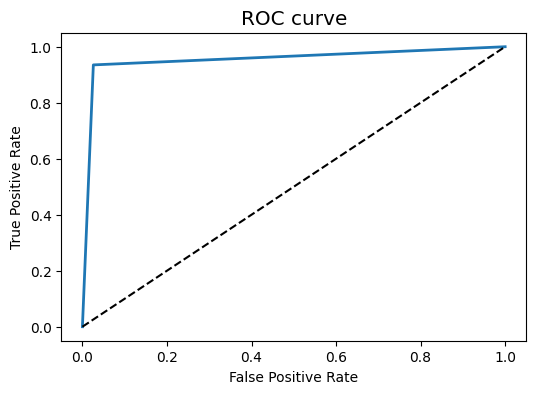

fpr: [0.         0.02586207 1.        ]
tps: [0.         0.93506494 1.        ]
We can easily say that the best threshold is where tpr = 0.9351 and fpr = 0.02586
ROC AUC : 0.9546
Program Runtime: 0.7867102200002591


In [16]:
# Linear SVM Classifier

import numpy as np
import pandas as pd
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import timeit

# start time of the program
start = timeit.default_timer()

df = pd.read_csv('/content/audit_risk.csv')

df = df.apply(pd.to_numeric, errors='coerce') # Converts nonnumeric values to NaN so that we can discard them later
df=df.dropna()  # Drops missing records

# Splits the data values from their classes
X = df.drop(['Risk'], axis = 1)
y = df['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 30)  # Splits the data into train set, test set and their classes

# Holds the columns of the variables
cols = X_train.columns

# Applies feature scaling (this procces turns them into numpy arrays)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Makes them dataframe again
X_train = pd.DataFrame(X_train, columns=[cols]) 
X_test = pd.DataFrame(X_test, columns=[cols])

cv_val = 6

#print(X_train.describe())
params = {
    'kernel': ['linear'] # Linear SVM
}

clf = GridSearchCV(
    estimator=SVC(), # Support vector classifier is selected 
    param_grid=params,
    cv=cv_val, # 6-fold cross validation     
    n_jobs=5,
)

# fits the data and test the results with both X_train and X_test data to see if there is an overfitting
clf.fit(X_train, y_train)
predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)
print('Accuracy Score Train:',accuracy_score(y_train, predictions_train))
print('Accuracy Score Test:',accuracy_score(y_test, predictions_test))

# Perform k-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=cv_val)
print("\nCross-validation scores:", cv_scores)
print("Mean cross-validation score: {:0.4}".format(np.mean(cv_scores)))


# Shows confusion matrix
cm = confusion_matrix(y_test, predictions_test)

print('Confusion matrix:\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])


# Draws ROC curve and prints the best threshold
fpr, tpr, thresholds = roc_curve(y_test, predictions_test)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print('fpr:', fpr)
print('tps:', tpr)
print('We can easily say that the best threshold is where tpr = {:.4} and fpr = {:.4}'.format(tpr[1], fpr[1]))

# Calculates and prints the AUC value
ROC_AUC = roc_auc_score(y_test, predictions_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

# end time of the program
stop = timeit.default_timer()

# Prints the elapsed time since the program started
print('Program Runtime:', stop - start)

audit_risk.csv file was used for linear SVM classifier algorithm.

Accuracy scores for train and test datas are similar so we can say that there is no overfitting. 

The deviation of the accuracy values in 6-fold cross validation test are similar.

We can say that the algorithm is good and it fits for this data.

In [17]:
# Linear SVM Regressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import get_scorer_names
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
import timeit

# start time of the program
start = timeit.default_timer()

df = pd.read_csv('/content/hour.csv')

df = df.apply(pd.to_numeric, errors='coerce') # Converts nonnumeric values to NaN so that we can discard them later
df=df.dropna(axis = 1)  # Drops missing records

X = df.drop(['instant', 'casual', 'registered', 'cnt'], axis = 1)
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 30)

# Holds the columns of the variables
cols = X_train.columns

# Applies feature scaling (this procces turns them into numpy arrays)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Makes them dataframe again
X_train = pd.DataFrame(X_train, columns=[cols]) 
X_test = pd.DataFrame(X_test, columns=[cols])

cv_val = 6

params = {
    'kernel': ['linear'] # Linear SVM
}

clf = GridSearchCV(
    estimator=SVR(), # Support vector regressor is selected
    param_grid=params,
    cv=cv_val,
    n_jobs=5,
)


# fits the data and test the results with both X_train and X_test data to see if there is an overfitting
clf.fit(X_train, y_train)
predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)

# Perform k-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=cv_val)
print("\nCross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))


print(clf.score(X_test, y_test))

print(predictions_train.shape)
print(y_train.shape)
print(predictions_test.shape)
print(y_test.shape)

# end time of the program
stop = timeit.default_timer()

# Prints the elapsed time since the program started
print('Program Runtime:', stop - start)


Cross-validation scores: [0.36033404 0.33609113 0.33898051 0.3441563  0.31590667 0.33151483]
Mean cross-validation score: 0.3378305776076685
0.3318495750928506
(13034,)
(13034,)
(4345,)
(4345,)
Program Runtime: 266.2566702429999


hour.csv file was used for linear SVM regressor algorithm.

The algorithm takes too much time and the result is really bad. SVM regressor algorithm is a bad choice for this dataset. We will see that decision tree regressor does better job for this dataset.

Accuracy Score Train: 0.8963730569948186
Accuracy Score Test: 0.8860103626943006

Cross-validation scores: [0.88659794 0.90721649 0.84536082 0.89583333 0.85416667 0.8125    ]
Mean cross-validation score: 0.8669
Confusion matrix:
 [[116   0]
 [ 22  55]]

True Positives(TP) =  116

True Negatives(TN) =  55

False Positives(FP) =  0

False Negatives(FN) =  22


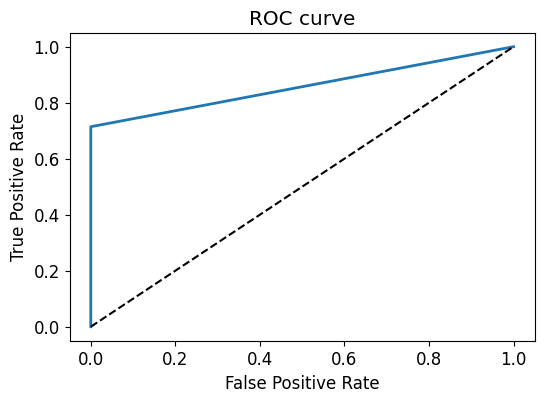

fpr: [0. 0. 1.]
tps: [0.         0.71428571 1.        ]
We can easily say that the best threshold is where tpr = 0.7143 and fpr = 0.0
ROC AUC : 0.8571
Program Runtime: 1.3653715949999423


In [18]:
# Polynomial SVM Classifier

import numpy as np
import pandas as pd
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import timeit

# start time of the program
start = timeit.default_timer()

df = pd.read_csv('/content/audit_risk.csv')

df = df.apply(pd.to_numeric, errors='coerce') # Converts nonnumeric values to NaN so that we can discard them later
df=df.dropna()  # Drops missing records

# Splits the data values from their classes
X = df.drop(['Risk'], axis = 1)
y = df['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 30)  # Splits the data into train set, test set and their classes

# Holds the columns of the variables
cols = X_train.columns

# Applies feature scaling (this procces turns them into numpy arrays)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Makes them dataframe again
X_train = pd.DataFrame(X_train, columns=[cols]) 
X_test = pd.DataFrame(X_test, columns=[cols])

cv_val = 6

#print(X_train.describe())
params = {
    'kernel': ['poly'] # Polynomial SVM
}

clf = GridSearchCV(
    estimator=SVC(), # Support vector classifier is selected 
    param_grid=params,
    cv=cv_val, # 6-fold cross validation     
    n_jobs=5,
)

# fits the data and test the results with both X_train and X_test data to see if there is an overfitting
clf.fit(X_train, y_train)
predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)
print('Accuracy Score Train:',accuracy_score(y_train, predictions_train))
print('Accuracy Score Test:',accuracy_score(y_test, predictions_test))

# Perform k-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=cv_val, scoring='accuracy')
print("\nCross-validation scores:", cv_scores)
print("Mean cross-validation score: {:0.4}".format(np.mean(cv_scores)))


# Shows confusion matrix
cm = confusion_matrix(y_test, predictions_test)

print('Confusion matrix:\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])


# Draws ROC curve and prints the best threshold
fpr, tpr, thresholds = roc_curve(y_test, predictions_test)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print('fpr:', fpr)
print('tps:', tpr)
print('We can easily say that the best threshold is where tpr = {:.4} and fpr = {:.4}'.format(tpr[1], fpr[1]))

# Calculates and prints the AUC value
ROC_AUC = roc_auc_score(y_test, predictions_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

# end time of the program
stop = timeit.default_timer()

# Prints the elapsed time since the program started
print('Program Runtime:', stop - start)

audit_risk.csv file was used for polynomial SVM classifier algorithm.

The same steps are implemented with linear SVM classifier.

According to accuracy values, 6-fold cross validation and ROC curve we can say that the algorithm fits the data and results are satisfying but the result of the linear algorithm were better.

So we can say that for this data set linear SVM classifier is better choise than polynomial SVM classifier.

Accuracy Score Train: 1.0
Accuracy Score Test: 1.0
Accuracy Score Train Alpha: 0.6062
Accuracy Score Test Alpha: 0.601

Cross-validation scores: [1.         1.         1.         1.         1.         0.98958333]
Mean cross-validation score: 0.9983

Cross-validation scores alpha: [0.60824742 0.60824742 0.60824742 0.60416667 0.60416667 0.60416667]
Mean cross-validation score: 0.6062
|--- feature_25 <= -0.15
|   |--- class: 0
|--- feature_25 >  -0.15
|   |--- class: 1

Program Runtime: 0.35016720299972803


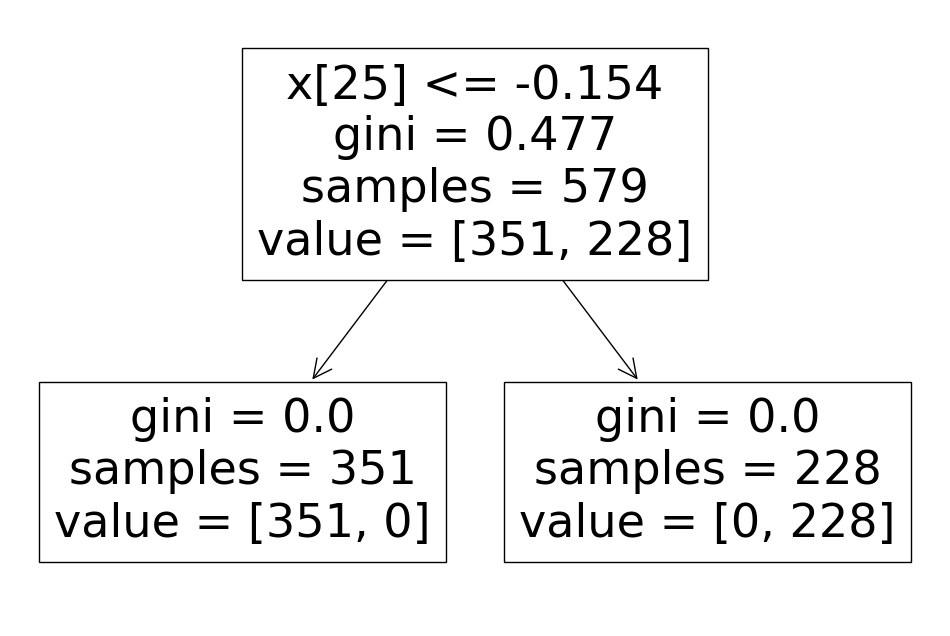

In [20]:
# Decision Tree Classifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_text
from sklearn import tree
import timeit


# start time of the program
start = timeit.default_timer()

df = pd.read_csv('/content/audit_risk.csv')

cv_val = 6

df = df.apply(pd.to_numeric, errors='coerce') # Converts nonnumeric values to NaN so that we can discard them later
df=df.dropna()  # Drops missing records

# Splits the data values from their classes
X = df.drop(['Risk'], axis = 1)
y = df['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 30)  # Splits the data into train set, test set and their classes

# Holds the columns of the variables
cols = X_train.columns

# Applies feature scaling (this procces turns them into numpy arrays)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Makes them dataframe again
X_train = pd.DataFrame(X_train, columns=[cols]) 
X_test = pd.DataFrame(X_test, columns=[cols])

clf = DecisionTreeClassifier(criterion='gini', random_state=30)
clf_alpha = DecisionTreeClassifier(criterion='gini', ccp_alpha = 0.5, random_state=30)


# fits the data and test the results with both X_train and X_test data to see if there is an overfitting
clf.fit(X_train, y_train)
predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)
print('Accuracy Score Train: {:0.4}'. format(accuracy_score(y_train, predictions_train)))
print('Accuracy Score Test: {:0.4}'. format(accuracy_score(y_test, predictions_test)))

# fits the data and test the results with both X_train and X_test data to see if there is an overfitting
clf_alpha.fit(X_train, y_train)
predictions_train = clf_alpha.predict(X_train)
predictions_test = clf_alpha.predict(X_test)
print('Accuracy Score Train Alpha: {:0.4}'. format(accuracy_score(y_train, predictions_train)))
print('Accuracy Score Test Alpha: {:0.4}'. format(accuracy_score(y_test, predictions_test)))



# Perform k-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=cv_val, scoring='accuracy')
print("\nCross-validation scores:", cv_scores)
print("Mean cross-validation score: {:0.4}".format(np.mean(cv_scores)))



# Perform k-fold cross-validation
cv_scores = cross_val_score(clf_alpha, X_train, y_train, cv=cv_val, scoring='accuracy')
print("\nCross-validation scores alpha:", cv_scores)
print("Mean cross-validation score: {:0.4}".format(np.mean(cv_scores)))

# Converts the decision tree into a set of rules
print(export_text(clf))

# Plots the decision tree figure
plt.figure(figsize=(12,8))
tree.plot_tree(clf.fit(X_train, y_train))


# end time of the program
stop = timeit.default_timer()

# Prints the elapsed time since the program started
print('Program Runtime:', stop - start)

audit_risk.csv file was used for decision tree classifier algorithm.

I implemented two different pruning strategies. In one of them I used ccp_alpha value but this made the algoirth worse. So there is no need to mention it.

The tree is already consist of two leaves and one root so if we use any pruning there is going to be just one root and this is not a good algorithm.

Without pruning both train and test accuracy scores are 1 so the algorithm is perfect and there is no overfitting.

In 6-fold cross validation almost all of the tess scores are one.

We can say that the algorithm perfectly fits for this data.


Cross-validation scores: [0.8877115  0.8946112  0.88863596 0.88204177 0.8755052  0.90205308]
Mean cross-validation score: 0.8884

Cross-validation scores with max depth: [0.50974892 0.48320771 0.50277087 0.4939172  0.49765921 0.48058237]
Mean cross-validation score: 0.4946
|--- feature_3 <= -0.73
|   |--- feature_3 <= -0.88
|   |   |--- feature_3 <= -1.45
|   |   |   |--- value: [43.78]
|   |   |--- feature_3 >  -1.45
|   |   |   |--- value: [15.08]
|   |--- feature_3 >  -0.88
|   |   |--- feature_6 <= -0.40
|   |   |   |--- value: [19.16]
|   |   |--- feature_6 >  -0.40
|   |   |   |--- value: [103.33]
|--- feature_3 >  -0.73
|   |--- feature_8 <= -0.14
|   |   |--- feature_1 <= -0.00
|   |   |   |--- value: [125.06]
|   |   |--- feature_1 >  -0.00
|   |   |   |--- value: [225.77]
|   |--- feature_8 >  -0.14
|   |   |--- feature_1 <= -0.00
|   |   |   |--- value: [245.92]
|   |   |--- feature_1 >  -0.00
|   |   |   |--- value: [380.88]

Program Runtime: 0.7897600709998187


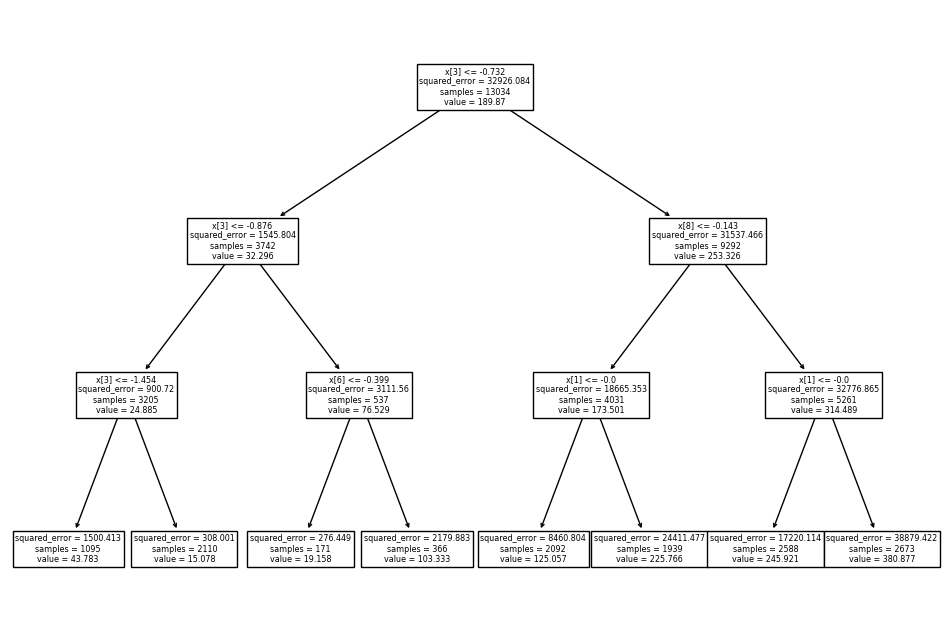

In [21]:
# Decision Tree Regressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_text
from sklearn import tree
import timeit

# start time of the program
start = timeit.default_timer()

df = pd.read_csv('/content/hour.csv')

cv_val = 6

df = df.apply(pd.to_numeric, errors='coerce') # Converts nonnumeric values to NaN so that we can discard them later
df=df.dropna(axis = 1)  # Drops missing records

X = df.drop(['instant', 'casual', 'registered', 'cnt'], axis = 1)
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 30)

# Holds the columns of the variables
cols = X_train.columns

# Applies feature scaling (this procces turns them into numpy arrays)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Makes them dataframe again
X_train = pd.DataFrame(X_train, columns=[cols]) 
X_test = pd.DataFrame(X_test, columns=[cols])

clf = DecisionTreeRegressor(criterion='squared_error', random_state=30)
clf_max_depth = DecisionTreeRegressor(criterion='squared_error', max_depth = 3, random_state=30)


# fits the data and test the results with both X_train and X_test data to see if there is an overfitting
clf.fit(X_train, y_train)
predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)

# fits the data and test the results with both X_train and X_test data to see if there is an overfitting
clf_max_depth.fit(X_train, y_train)
predictions_train_max_depth = clf_max_depth.predict(X_train)
predictions_test_max_depth = clf_max_depth.predict(X_test)


# Plots the decision tree figure
plt.figure(figsize=(12,8))
tree.plot_tree(clf_max_depth.fit(X_train, y_train))

# Perform k-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=cv_val)
print("\nCross-validation scores:", cv_scores)
print("Mean cross-validation score: {:0.4}".format(np.mean(cv_scores)))

# Perform k-fold cross-validation
cv_scores = cross_val_score(clf_max_depth, X_train, y_train, cv=cv_val)
print("\nCross-validation scores with max depth:", cv_scores)
print("Mean cross-validation score: {:0.4}".format(np.mean(cv_scores)))

# Converts the decision tree into a set of rules
print(export_text(clf_max_depth))

# end time of the program
stop = timeit.default_timer()

# Prints the elapsed time since the program started
print('Program Runtime:', stop - start)

hour.csv file was used for decision tree classifier algorithm.

I implemented the algorithm with two different strategies.
There is no max_depth value in one implementation and in the other implementation it is 3. 

With this pre-pruning strategy tree became so much smaller, so we can understand the set of rules of the tree and it is possible to visaulize the tree. But the accuracy of the algorithm became so much smaller so it is better to not determine a max_depth value (or to determine higher value) to get better results.

Without prepruning, according to 6-fold cross validation we can say that the algorithm fits for the data and there is no overfitting.